# NLP Basics

Si estamos corriendo la libreta en local descomenta la celda siguiente para tener los módulos necesarios:

In [204]:
#  Si no tenemos el módulo podemos descargarlo mediante:
# ! pip install nltk
# ! pip install wordcloud

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import pandas as pd
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import pos_tag
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('cess_esp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [207]:
with open("/content/drive/MyDrive/Colab Notebooks/Machine_learning/NLP/el_quijote.txt", 'r', encoding='utf-8') as myfile:
    quijote = myfile.read().replace('\n', ' ')

In [208]:
# Tenemos el quijote como un solo string:
quijote

'El ingenioso hidalgo don Quijote de la Mancha   TASA  Yo, Juan Gallo de Andrada, escribano de Cámara del Rey nuestro señor, de los que residen en su Consejo, certifico y doy fe que, habiendo visto por los señores dél un libro intitulado El ingenioso hidalgo de la Mancha, compuesto por Miguel de Cervantes Saavedra, tasaron cada pliego del dicho libro a tres maravedís y medio; el cual tiene ochenta y tres pliegos, que al dicho precio monta el dicho libro docientos y noventa maravedís y medio, en que se ha de vender en papel; y dieron licencia para que a este precio se pueda vender, y mandaron que esta tasa se ponga al principio del dicho libro, y no se pueda vender sin ella. Y, para que dello conste, di la presente en Valladolid, a veinte días del mes de deciembre de mil y seiscientos y cuatro años.  Juan Gallo de Andrada.  TESTIMONIO DE LAS ERRATAS  Este libro no tiene cosa digna que no corresponda a su original; en testimonio de lo haber correcto, di esta fee. En el Colegio de la Madr

In [209]:
# Lo tokenizamos para estudiarlo:
w_quijote = word_tokenize(quijote, language="spanish")

# Las diez primeras palabras:
w_quijote[:10]

['El',
 'ingenioso',
 'hidalgo',
 'don',
 'Quijote',
 'de',
 'la',
 'Mancha',
 'TASA',
 'Yo']

In [210]:
# Vemos las diez palabras más frecuentes:

freq_w_quijote = FreqDist(w_quijote)
freq_w_quijote.most_common(20)

[(',', 40174),
 ('que', 20520),
 ('de', 17988),
 ('y', 17155),
 ('la', 10201),
 ('a', 9525),
 ('.', 7970),
 ('el', 7960),
 ('en', 7900),
 ('no', 5760),
 (';', 4802),
 ('se', 4691),
 ('los', 4681),
 ('con', 4048),
 ('por', 3759),
 ('las', 3423),
 ('lo', 3390),
 ('le', 3382),
 ('su', 3320),
 ('don', 2538)]

## Separators

Conjunto de símbolos sin significado que sirven de manera auxiliar a las palabras pero que carecen de significado: Eg; , . ?

## Stopwords

Palabras de la lengua que apenas tienen valor semántico (de significado), que por lo tanto para poder sacar conclusiones del texto omitiremos

In [211]:
# Los stopwords se incluyen dentro del nltk, podemos treaer la lista de los stopwords del español:
stopwords.words("spanish")[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

# NM words

_No Meaning Words_ o _palabras sin significado_ son el conjunto de palabras que vamos a quitar de nuestro texto por propia selección dado que no nos aportan significado, como por ejemplo los nombres (carecen de valor semántico)

_Eg; si quisieramos determinar si un correo es spam en base a lo que se dice dará igual como se llame a quien se envía._


In [212]:
# Vamos a extraer ambos nuestras palabras para poder analizar el quijote, además de toda palabra que tenga menos de tres letras:

# Para ello diseñamos un filtro:
w_quijote_filtered = []

separators = [",", ".", "!", "?", "¿"]
nm_words = ["quijote", "sancho", "don"]

for w in w_quijote:
  if w.lower() in separators:
    pass
  elif w.lower() in stopwords.words("spanish"):
    pass
  elif w.lower() in nm_words:
    pass
  elif len(w) < 3:
    pass
  else:
    w_quijote_filtered.append(w)

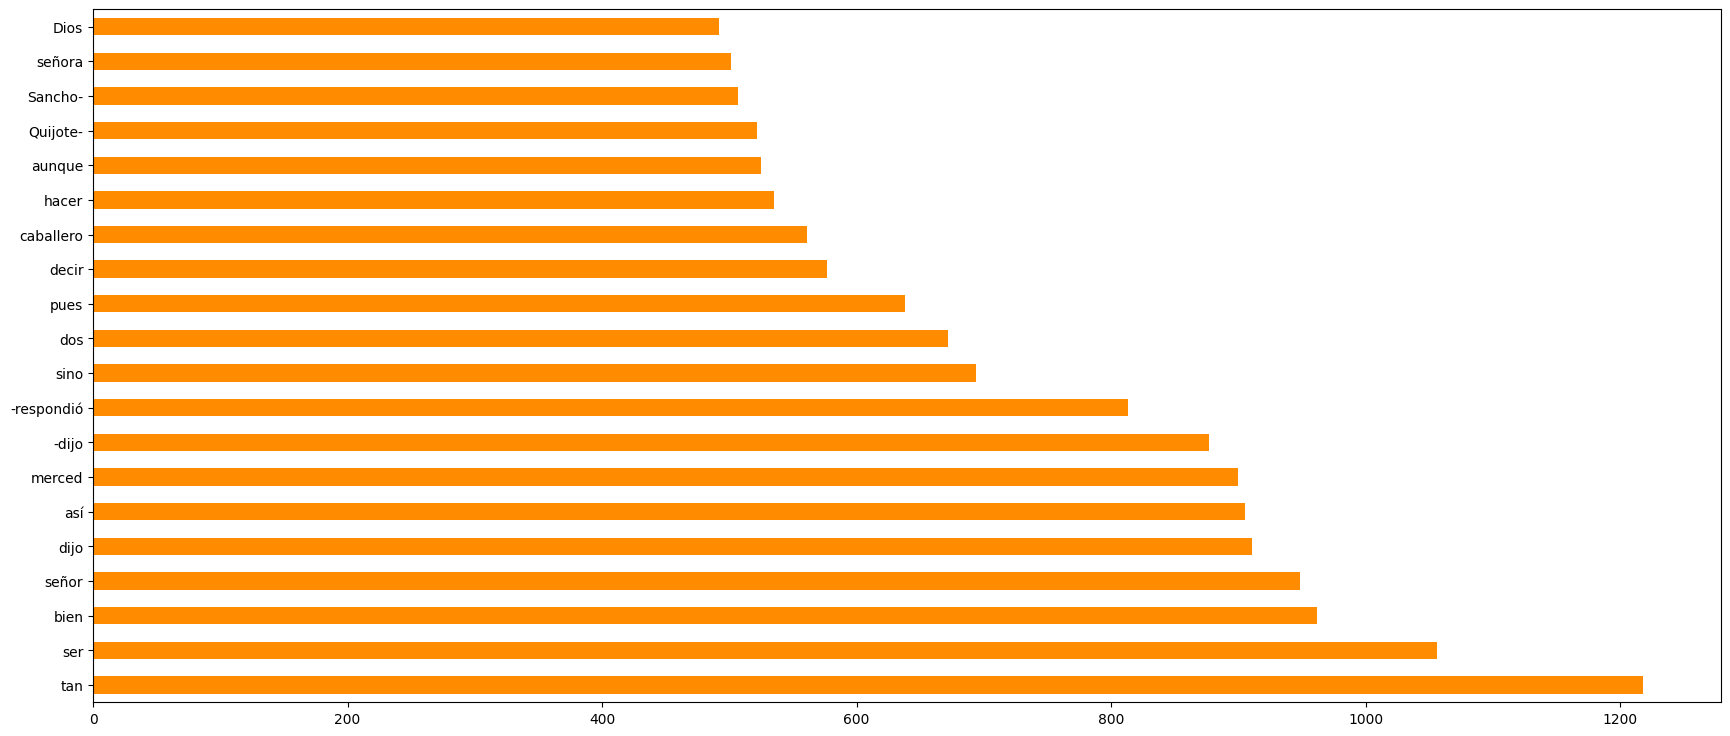

In [213]:
# Veamos de manera gráfica el resultado:
fig, ax = plt.subplots(figsize=(21, 9))
pd.Series(w_quijote_filtered).value_counts()[:20].plot(kind="barh", color = "darkorange");

## Mejorar los fitros

En lugar de filtrar las palabras con poco valor semántico vamos a buscar aquellas con alto valor semántico, esto son, esencialmente los adjetivos:

### POS _Part Of Speech_

Esta técnica, dada una plabra nos permite determinar qué es (sustantivo, verbo, adjetivo), por lo que podemos emplearla para solo tomar las que realmente nos interese:

Para ver que categorías tiene NLTK:
https://cs.nyu.edu/grishman/jet/guide/PennPOS.html



In [214]:
w_tweet_1_cat = pos_tag(w_quijote_filtered)
w_tweet_1_cat[:10]

[('ingenioso', 'NN'),
 ('hidalgo', 'NN'),
 ('Mancha', 'NNP'),
 ('TASA', 'NNP'),
 ('Juan', 'NNP'),
 ('Gallo', 'NNP'),
 ('Andrada', 'NNP'),
 ('escribano', 'NN'),
 ('Cámara', 'NNP'),
 ('Rey', 'NNP')]

In [215]:
w_quijote_filtered_pos = []

for pos_w in pos_tag(w_quijote_filtered):
    if pos_w[1].startswith('JJ'): # Nos quedamos solo con lo adjetivos
        w_quijote_filtered_pos.append(pos_w[0])

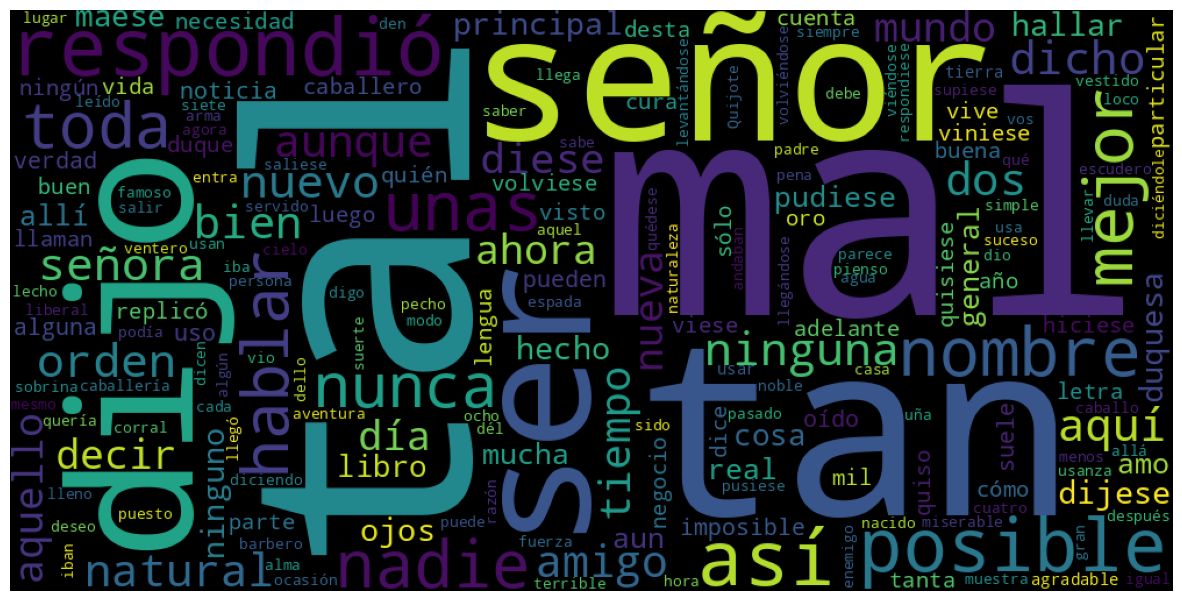

In [216]:
from wordcloud import WordCloud
w_quijote_filtered_pos_join = ' '.join(w_quijote_filtered_pos) #Para juntar las palabras en un solo texto, para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(w_quijote_filtered_pos_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Ejercicio:

Ahora tendrás las reviews de varias peliculas etiquetadas como postivas y negativas, verifica en base a estas técnicas que la clasificaición es correcta y haz un wordcloud con los adjetivos más frecuentes

In [217]:
reviews_pos = []
reviews_neg = []

with open(r'/content/drive/MyDrive/Colab Notebooks/Machine_learning/NLP/reviews.txt', "r", encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')
        if trozos[0] == '0':
            # Negativos
            reviews_neg.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            reviews_pos.append(trozos[1].lower())

In [218]:
reviews_neg[:10]

['da vinci code was a terrible movie.\n',
 'then again, the da vinci code is super shitty movie, and it made like 700 million.\n',
 'the da vinci code comes out tomorrow, which sucks.\n',
 'i thought the da vinci code movie was really boring.\n',
 "god, yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now.\n",
 'da vinci code does suck.\n',
 'and better...-we all know da vinci code is bogus and inaccurate.\n',
 'last time, da vinci code is also a bit disappointing to me, because many things written in the book is never mentioned in movie.\n',
 'and better...-we all know da vinci code is bogus and inaccurate.\n',
 'and better..-we all know da vinci code is bogus and inaccurate.\n']

In [219]:
# Cualquiera que quieras emplear, primero las juntamos para que sean un solo texto como en el caso del quijote:
# Quitamos también la coletilla para indicar el fin de una línea:
reviews_neg_join = "".join(reviews_neg).replace("\n", "")
reviews_pos_join = "".join(reviews_pos).replace("\n", "")

In [220]:
reviews_neg_join[:3000]

'da vinci code was a terrible movie.then again, the da vinci code is super shitty movie, and it made like 700 million.the da vinci code comes out tomorrow, which sucks.i thought the da vinci code movie was really boring.god, yahoo games has this truly-awful looking da vinci code-themed skin on it\'s chessboard right now.da vinci code does suck.and better...-we all know da vinci code is bogus and inaccurate.last time, da vinci code is also a bit disappointing to me, because many things written in the book is never mentioned in movie.and better...-we all know da vinci code is bogus and inaccurate.and better..-we all know da vinci code is bogus and inaccurate.and better..-we all know da vinci code is bogus and inaccurate.if jesus is fabricated a la the da vinci code then christianity is worthless...i think this bolsters my arguments that both england and the da vinci code sucks...and better..-we all know da vinci code is bogus and inaccurate.i really hate the da vinci code.the more you sa

In [221]:
w_rev_neg = word_tokenize(reviews_neg_join)

In [222]:
rev_neg_filtered = []

separators = [",", ".", "!", "?", "¿", "..."]
nm_words = ["da", "vinci", "code", "mountain", "harry", "guy", "potter", "code", "brokeback", "mission", "impossible", "left", "right"]

for w in w_rev_neg:
  if w.lower() in separators:
    pass
  elif w.lower() in stopwords.words("english"):
    pass
  elif w.lower() in nm_words:
    pass
  elif len(w) < 3:
    pass
  else:
    rev_neg_filtered.append(w)

In [223]:
freq_w_rev_neg = FreqDist(rev_neg_filtered)
freq_w_rev_neg.most_common(20)

[('hate', 571),
 ('sucked', 571),
 ('sucks', 414),
 ('movie', 376),
 ('stupid', 356),
 ('much', 264),
 ('suck', 189),
 ('really', 188),
 ('horrible', 177),
 ('movies', 172),
 ('terrible', 170),
 ('fucking', 169),
 ('think', 112),
 ('know', 101),
 ('one', 101),
 ('depressing', 101),
 ('heard', 94),
 ('went', 90),
 ('way', 89),
 ('ever', 88)]

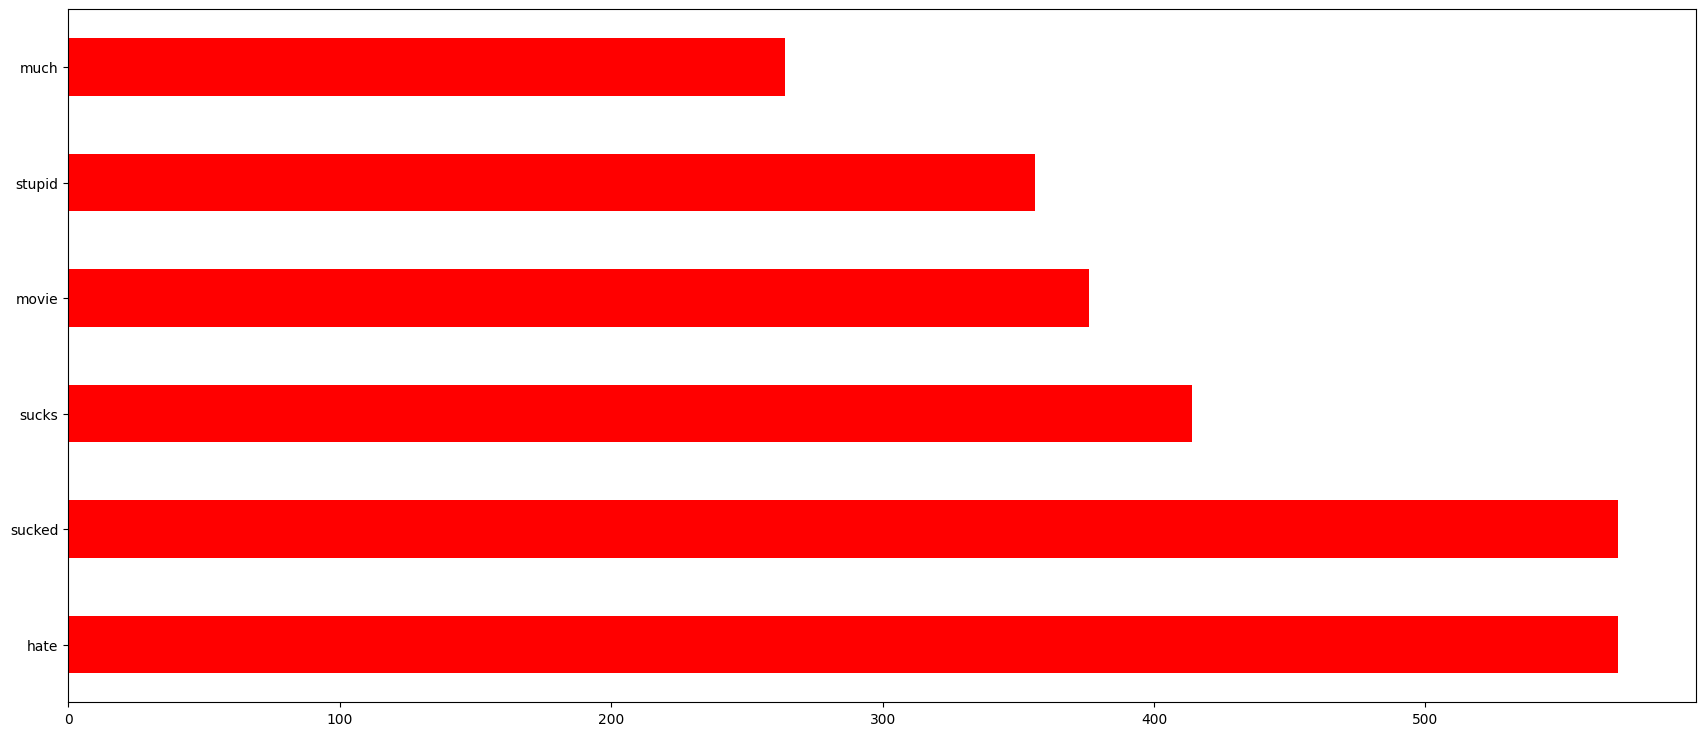

In [224]:
fig, ax = plt.subplots(figsize=(21, 9))
pd.Series(rev_neg_filtered).value_counts()[:6].plot(kind="barh", color = "red");

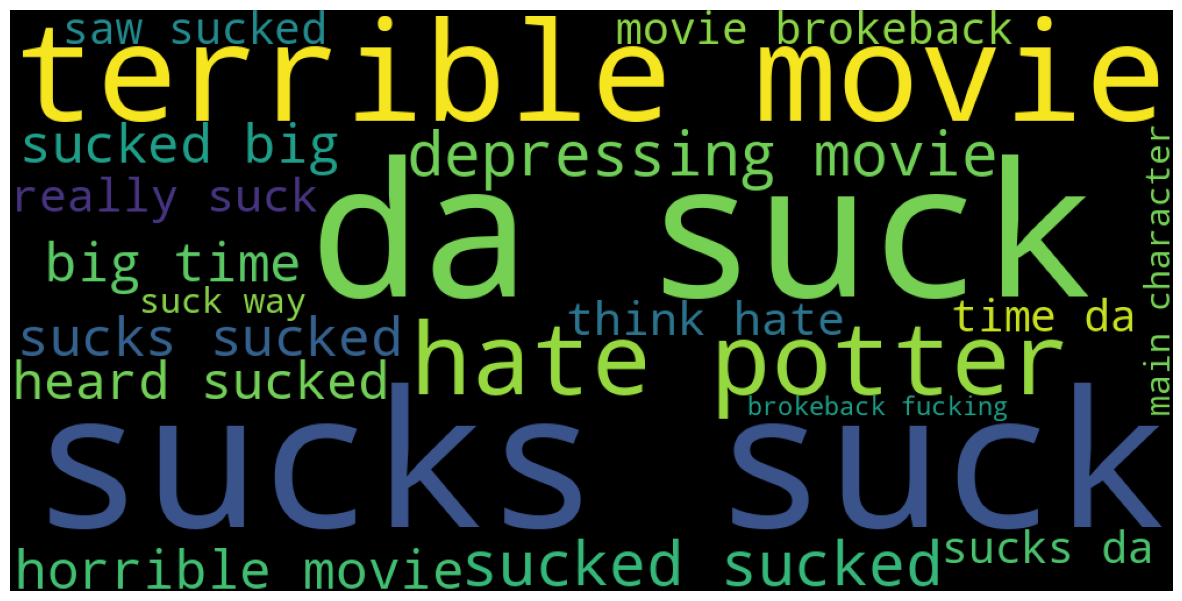

In [225]:
rev_neg_filtered_join = ' '.join(rev_neg_filtered) # Juntamos las palabras en un solo texto para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.6, max_words = 20).generate(rev_neg_filtered_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [226]:
rev_neg_filtered_adj = []

for pos_w in pos_tag(rev_neg_filtered):
    if pos_w[1].startswith('JJ'): # Nos quedamos solo con los adjetivos
        rev_neg_filtered_adj.append(pos_w[0])

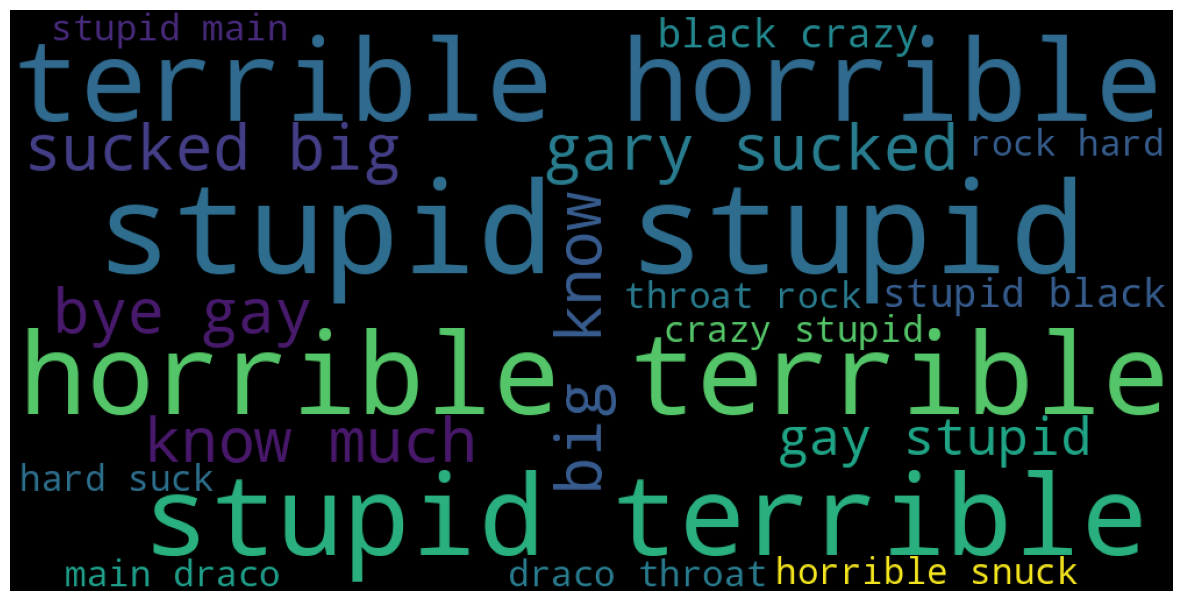

In [227]:
rev_neg_filtered_adj_join = ' '.join(rev_neg_filtered_adj) # Juntamos las palabras en un solo texto para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5, max_words = 20).generate(rev_neg_filtered_adj_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [228]:
w_rev_pos = word_tokenize(reviews_pos_join)

In [229]:
rev_pos_filtered = []

separators = [",", ".", "!", "?", "¿", "...", "...."]
nm_words = ["vinci", "code", "movie", "movies", "mountain", "mountain.i", "harry", "guy", "potter.i", "potter", "code", "n't", "brokeback", "mission", "impossible", "left", "right"]

for w in w_rev_pos:
  if w.lower() in separators:
    pass
  elif w.lower() in stopwords.words("english"):
    pass
  elif w.lower() in nm_words:
    pass
  elif len(w) < 3:
    pass
  else:
    rev_pos_filtered.append(w)

In [230]:
freq_w_rev_pos = FreqDist(rev_pos_filtered)
freq_w_rev_pos.most_common(20)

[('love', 1531),
 ('awesome', 994),
 ('like', 950),
 ('loved', 255),
 ('much', 187),
 ('really', 186),
 ('one', 180),
 ('know', 175),
 ('series', 174),
 ('want', 172),
 ('would', 172),
 ('people', 167),
 ('felicia', 160),
 ('beautiful', 124),
 ('book', 116),
 ('good', 108),
 ('read', 101),
 ('liked', 99),
 ('also', 97),
 ('first', 95)]

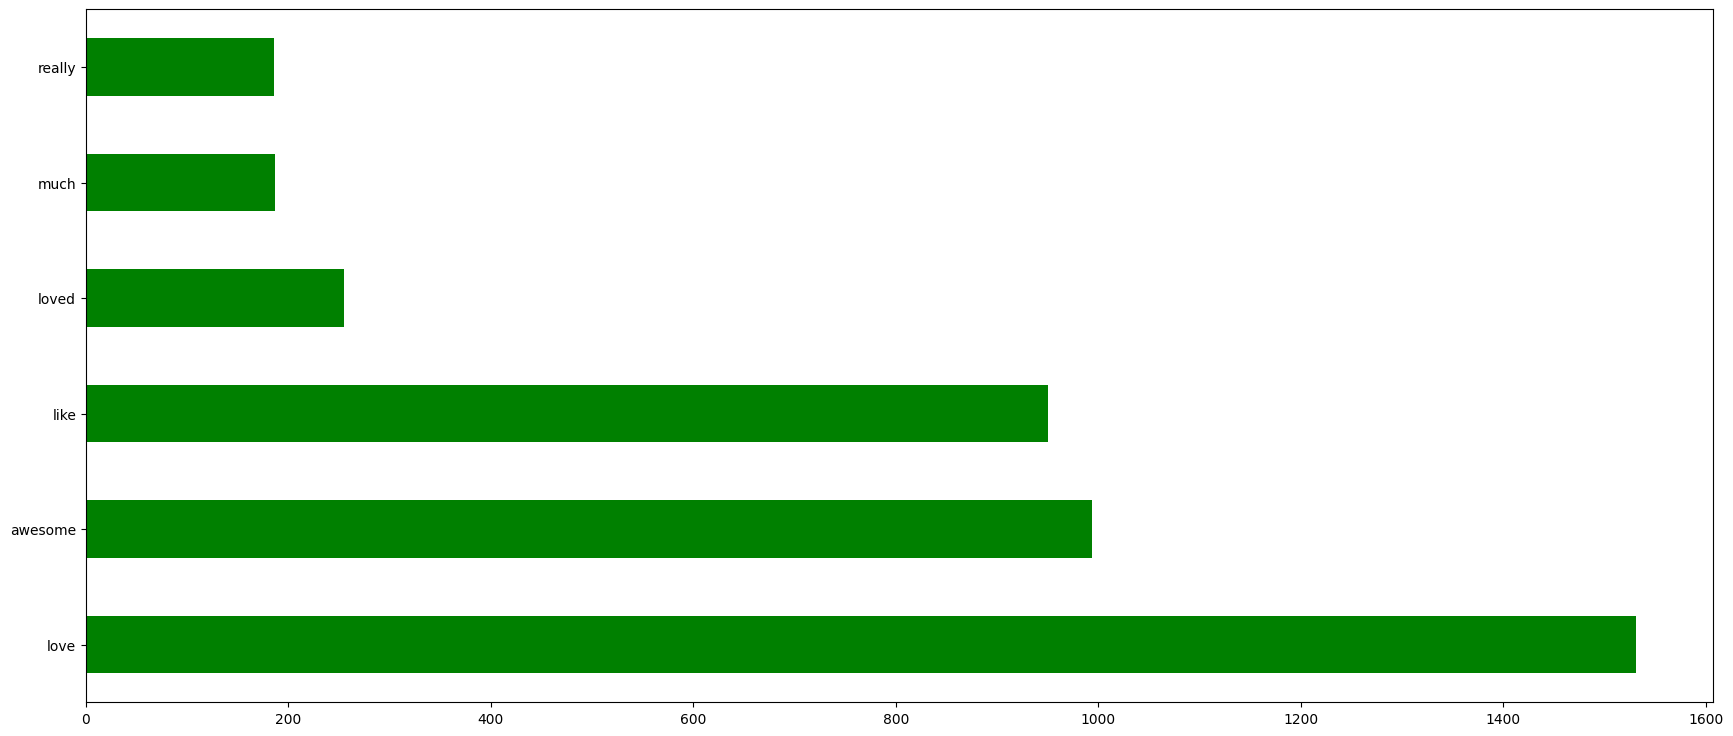

In [231]:
fig, ax = plt.subplots(figsize=(21, 9))
pd.Series(rev_pos_filtered).value_counts()[:6].plot(kind="barh", color = "green");

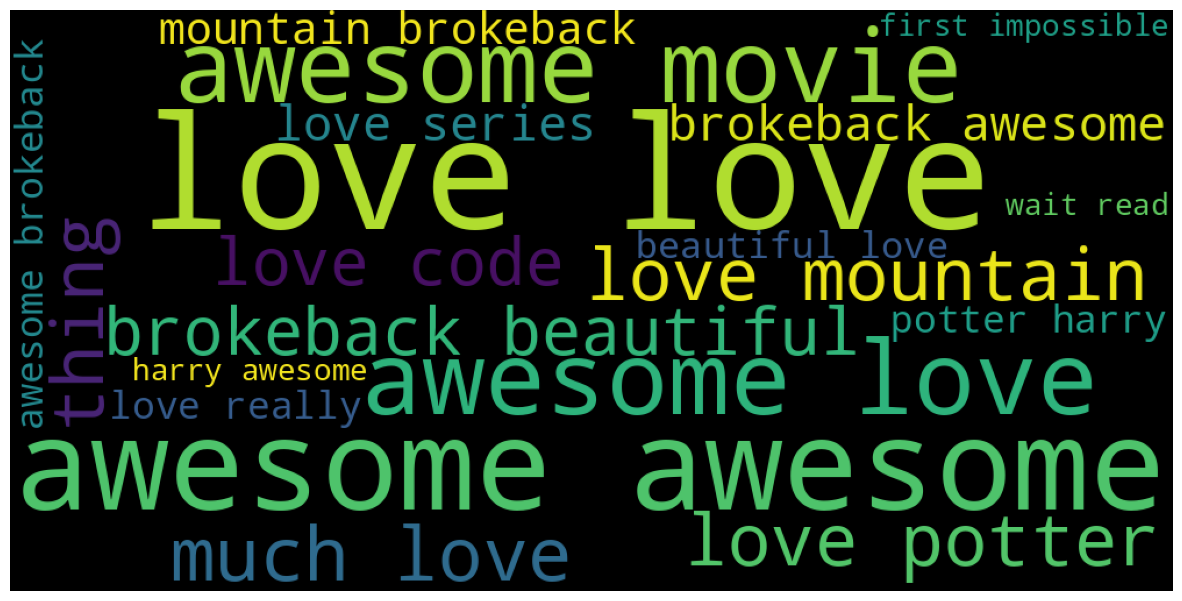

In [232]:
rev_pos_filtered_join = ' '.join(rev_pos_filtered) # Juntamos las palabras en un solo texto para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.6, max_words = 20).generate(rev_pos_filtered_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [233]:
rev_pos_filtered_adj = []

for pos_w in pos_tag(rev_pos_filtered):
    if pos_w[1].startswith('JJ'): # Nos quedamos solo con lo adjetivos
        rev_pos_filtered_adj.append(pos_w[0])

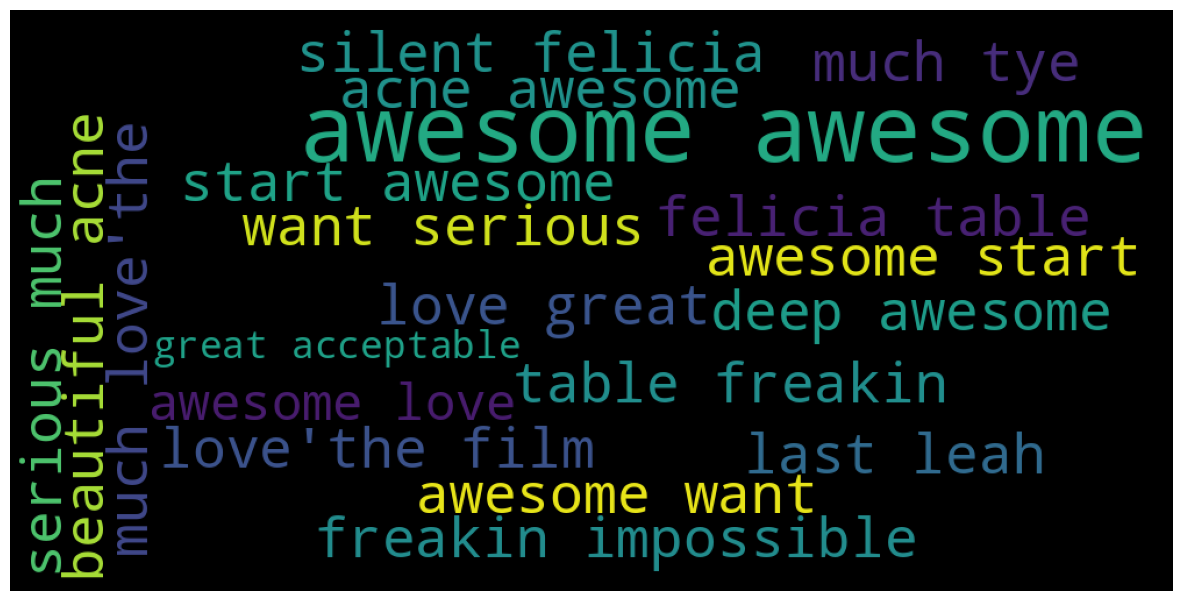

In [234]:
rev_pos_filtered_adj_join = ' '.join(rev_pos_filtered_adj) #Para juntar las palabras en un solo texto, para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5,  max_words = 20).generate(rev_pos_filtered_adj_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [235]:
from nltk.metrics.distance import edit_distance

In [236]:
w_1 = "sucks"
w_2 = "suck"

distance_w = edit_distance(w_1, w_2)
distance_w

1